
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [20]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [21]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [22]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_11 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_12 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [6]:
# 第三步：編譯, 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [8]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 


'\n   宣告並設定\n   batch_size：對總的樣本數進行分組，每組包含的樣本數量\n   epochs ：訓練次數\n   \n'

In [9]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = 64, epochs=10, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 14s - loss: 2.8922 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 2/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 3/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 4/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 5/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 6/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 7/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 8/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 9/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 10/10
 - 14s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194


In [10]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8912137079238893, 0.8196400165557861]

 The accuracy of the model is 0.098200 


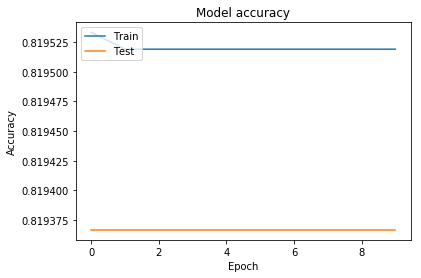

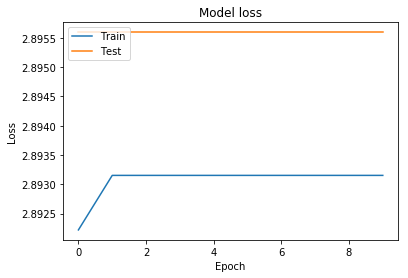

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [17]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = 64, epochs=10, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 56s - loss: 0.3896 - acc: 0.9594 - val_loss: 0.0710 - val_acc: 0.9835
Epoch 2/10
 - 56s - loss: 0.0458 - acc: 0.9881 - val_loss: 0.0664 - val_acc: 0.9842
Epoch 3/10
 - 56s - loss: 0.0219 - acc: 0.9937 - val_loss: 0.0438 - val_acc: 0.9884
Epoch 4/10
 - 56s - loss: 0.0117 - acc: 0.9966 - val_loss: 0.0421 - val_acc: 0.9896
Epoch 5/10
 - 56s - loss: 0.0061 - acc: 0.9984 - val_loss: 0.0402 - val_acc: 0.9903
Epoch 6/10
 - 55s - loss: 0.0036 - acc: 0.9993 - val_loss: 0.0394 - val_acc: 0.9906
Epoch 7/10
 - 55s - loss: 0.0021 - acc: 0.9997 - val_loss: 0.0398 - val_acc: 0.9905
Epoch 8/10
 - 55s - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0399 - val_acc: 0.9907
Epoch 9/10
 - 55s - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0399 - val_acc: 0.9907
Epoch 10/10
 - 55s - loss: 9.7406e-04 - acc: 0.9999 - val_loss: 0.0401 - val_acc: 0.9909


In [18]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.035442661130509805, 0.9910500228404999]

 The accuracy of the model is 0.954900 


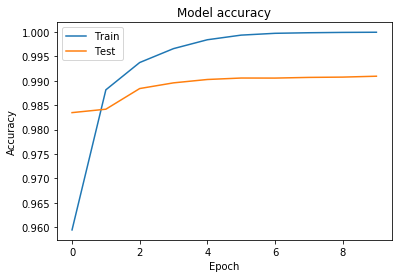

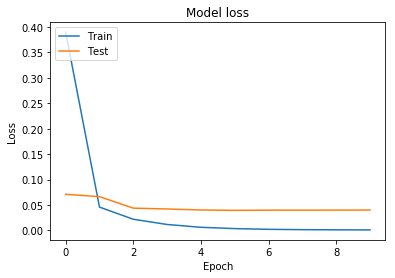

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [24]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [25]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = 64, epochs=10, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 87s - loss: 2.8920 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 2/10
 - 87s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 3/10
 - 86s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 4/10
 - 85s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 5/10
 - 86s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 6/10
 - 86s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 7/10
 - 87s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 8/10
 - 86s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 9/10
 - 87s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 10/10
 - 87s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194


In [26]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8912137079238893, 0.8196400165557861]

 The accuracy of the model is 0.098200 


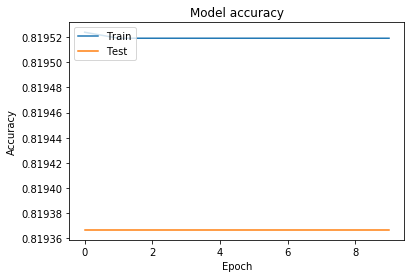

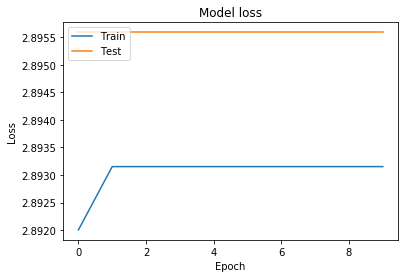

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()